In [48]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Fonction pour calculer la distance euclidienne
def distance_euclidienne(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

In [40]:
def k_nearest_neighbors(X_train, y_train, X_test, k):
    y_pred = []
    
    for test_point in X_test:
        distances = []
        
        # Calcul des distances entre le point de test et tous les points d'entraînement
        for i in range(len(X_train)):
            dist = distance_euclidienne(test_point, X_train[i])
            distances.append((dist, y_train[i]))  # Stocker la distance et la classe associée
        
        # Trier les distances et sélectionner les k plus proches voisins
        distances.sort(key=lambda x: x[0])
        top_k = distances[:k]
        
        # Extraire les classes des k plus proches voisins
        classes = [neighbor[1] for neighbor in top_k]
        
        # Déterminer la classe la plus fréquente parmi les k voisins
        classe_predite = Counter(classes).most_common(1)[0][0]
        y_pred.append(classe_predite)
    
    return np.array(y_pred)

In [41]:
def load_dataset(filename):
    X, y = [], []
    with open(filename, 'r') as file:
        for line in file:
            values = line.strip().split(',')
            X.append([float(value) for value in values[:-1]])  # Toutes les colonnes sauf la dernière
            y.append(values[-1])  # Dernière colonne pour les étiquettes
    return np.array(X), np.array(y)

def load_test_set(filename):
    X = []
    with open(filename, 'r') as file:
        for line in file:
            values = line.strip().split(',')
            X.append([float(value) for value in values])
    return np.array(X)

Prédictions pour le fichier de test: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolo

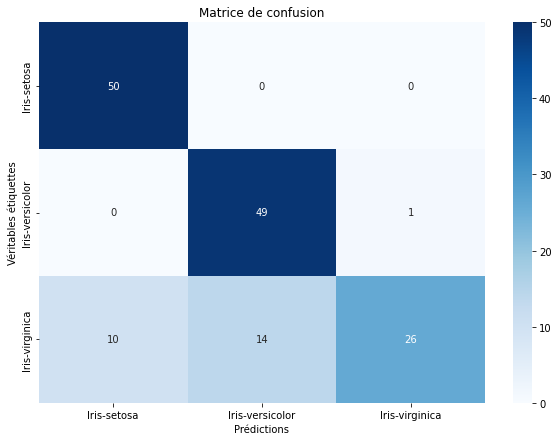

In [ ]:
X_train, y_train = load_dataset("dataset.txt")
X_test = load_test_set("data_test.txt")

k = 10

predictions = k_nearest_neighbors(X_train, y_train, X_test, k)
print("Prédictions pour le fichier de test:", predictions)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_train, predictions)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.title('Matrice de confusion')
plt.show()
